# Sesión 02 - Regresión Lineal

* Intalar las librerias

In [3]:
pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.3/36.3 MB 7.0 MB/s eta 0:00:00m eta 0:00:010:00:01m
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 10.5 MB/s eta 0:00:00m eta 0:00:016m0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.7/300.7 kB 7.8 MB/s eta 0:00:00m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 9.4 MB/s eta 0:00:000m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.3 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 8.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 7.1 MB/s eta 0:00:00 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np

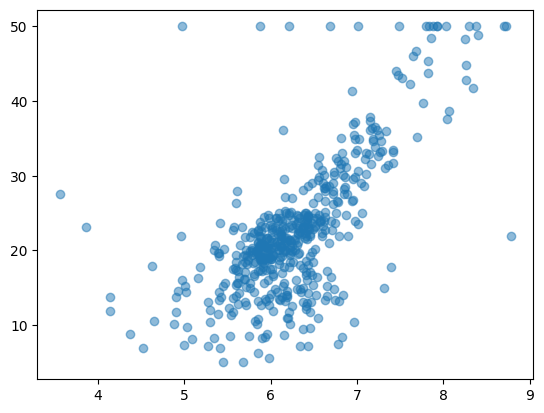

In [9]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


M = data[:,5] #Número de habitaciones por vivienda
N = target #Precios

X = data[:,5] #Número de habitaciones por vivienda
Y = target #Precios
#print("\t\t------------ X ------\n",X)
#print("\t\t------------ Y ------\n",Y)

#print(type(raw_df))
#print("\n\t\t--------\n",raw_df)
plt.scatter(X,Y,alpha=0.5)

**Fórmula: minimizar el error cuadrático medio (MSE):** $W = (X^{T}X)^{-1}X^{T}Y$


- Añadir una columna de 1's a X

In [3]:
#Añadir una columna de 1's a X, lugo sacar la Transpuesta.
X = np.array([np.ones(X.size),X]).T
print(X)

[[1.    6.575]
 [1.    6.421]
 [1.    7.185]
 ...
 [1.    6.976]
 [1.    6.794]
 [1.    6.03 ]]


In [4]:
#Hallamos W = (XT x X)^-1 XT Y
#X.T.dot(X) ---- XT x X
# np.linalg.inv(X.T.dot(X))
#np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print(f'Intersección con el eje Y:{W[0]:.2f} y la pendiente : {W[1]:.2f}')
#[-34.67062078   9.10210898]

Intersección con el eje Y:-34.67 y la pendiente : 9.10


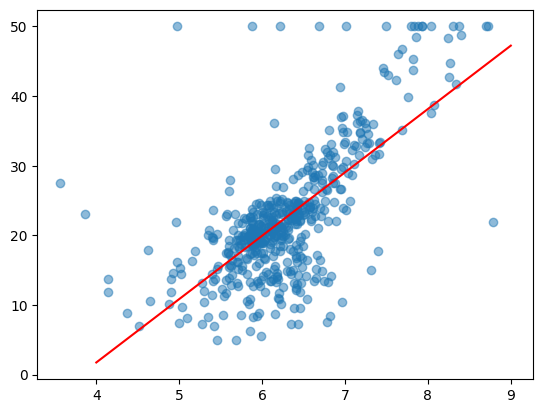

In [48]:

Y_4 = W[0] + W[1]*4
Y_9 = W[0] + W[1]*9
plt.scatter(M,N,alpha=0.5)
plt.plot([4,9],[Y_4,Y_9], c='red')

* **Ahora mejoraremos la solución para resolver con todos los atributos de la base de datos**

In [5]:
X = np.array(data)
Y = np.array(target)
unos = np.ones((X.shape[0],1))
X = np.hstack((unos,X))
W = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
print(W)
# precio = 3.645 - -0.108X 0.0464X2 + ....


[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 -1.77666112e+01  3.80986521e+00  6.92224640e-04
 -1.47556685e+00  3.06049479e-01 -1.23345939e-02 -9.52747232e-01
  9.31168327e-03 -5.24758378e-01]


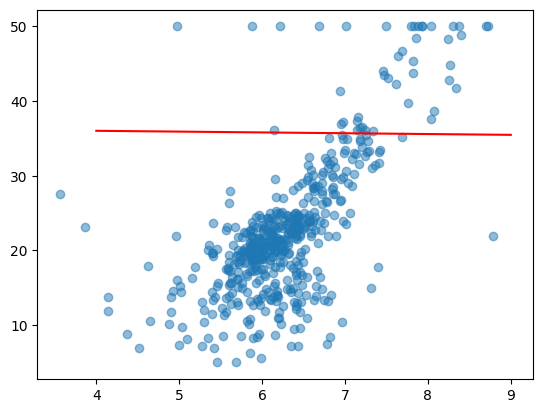

In [6]:
Y_4 = W[0] + W[1]*4
Y_9 = W[0] + W[1]*9
# plt.scatter(M,N,alpha=0.5)
plt.scatter(X[:,6],Y,alpha=.5)
plt.plot([4,9],[Y_4,Y_9], c='red')

# Descendiente de la gradiente

In [7]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

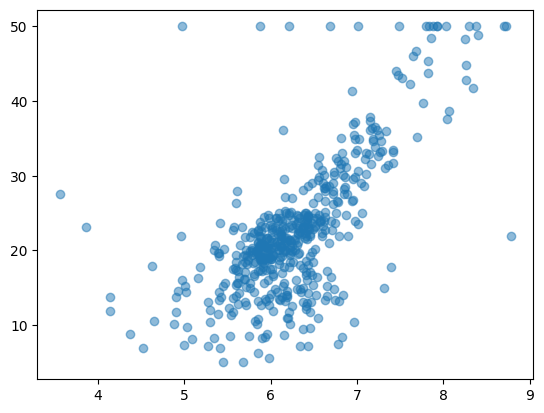

In [10]:
x = np.array(data[:,5])
y = np.array(target)
plt.scatter(x,y,alpha=0.5)

In [14]:
# definir funciones
#x vector independiente
#y vector dependiente
#w0 y w1 inicial aleatoriamente
#lr: learnin rate, tamaño de mis pasos
#epoca: cúantos pasos daré?
def descenso_gradiente(x,y,w0,w1,lr,epocas):
    num_obs = len(x) #len(y)
    for epoca in range(epocas):
        w0_deriv = 0
        w1_deriv = 0
        for i in range(num_obs):
            h_i = w0 + w1*x[i] #pronóstico
            w0_deriv = w0_deriv + (h_i - y[i]) #w0_deriv += (h_i - y[i])
            w1_deriv = w1_deriv + (h_i - y[i]*x[i])
        w0 = w0 - (w0_deriv/num_obs) * lr
        w1 = w1 - (w1_deriv/num_obs) * lr
    return w0, w1

In [20]:
w0 = 1
w1 = 1
lr = 0.01
epocas = 1000
w0, w1 = descenso_gradiente(x,y,w0, w1, lr, epocas)
w0, w1

(-1048.2749949226172, 187.34709203387968)

In [ ]:
# tiempo: 1:57:21 - CLASE 02